In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
raw_df=pd.read_csv('Mall_Customers.csv')

In [3]:
df=raw_df.copy()

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# **COUNT PLOT OF CATEGORICAL FEATURE GENDER**

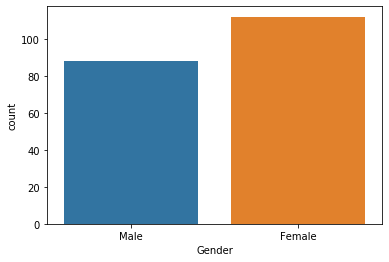

In [9]:
sns.countplot(df['Gender'])
plt.show()

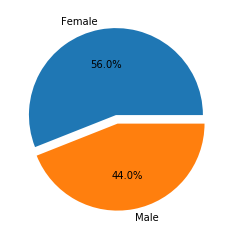

In [10]:
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',labels=['Female','Male'],explode=(0,0.1))
plt.show()

 *Female customers are more in number than make customers in the data.*

# **DISTRIBUTION PLOTS OF NUMERICAL FEATURES**

In [11]:
num_df=df.select_dtypes(include='int')
num_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


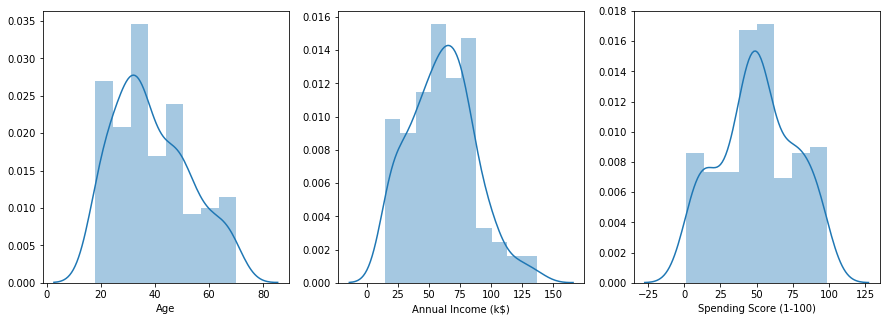

In [12]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['Age'],ax=axes[0])
sns.distplot(df['Annual Income (k$)'],ax=axes[1])
sns.distplot(df['Spending Score (1-100)'],ax=axes[2])
plt.show()


The numerical features distribution are not very skewed thus no transformation is required.

# **SPENDING SCORE VS AGE**

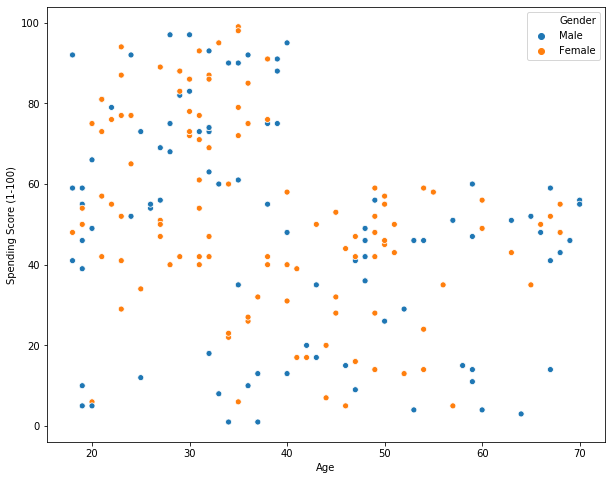

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Age'],df['Spending Score (1-100)'],hue=df['Gender'])
plt.show()

# **INCOME VS SPENDING SCORE**


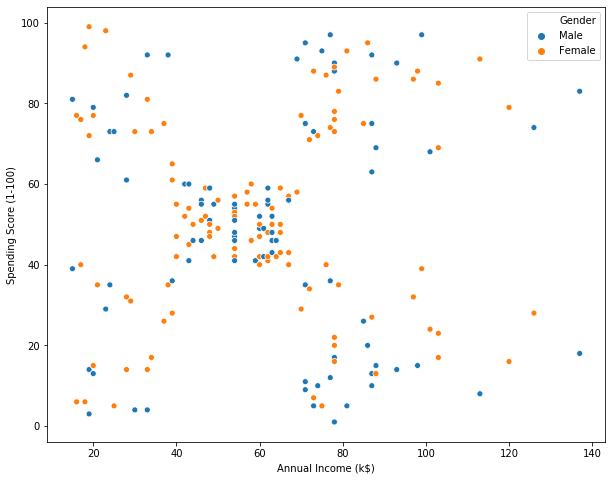

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['Gender'])
plt.show()

*The above scatter plots depicts that the features are independent of each other*

# **STANDARD SCLAING OF FEATURES**

In [15]:
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [17]:
scaler=StandardScaler().fit(df.iloc[:,1:])

In [18]:
scaler.mean_

array([38.85, 60.56, 50.2 ])

In [19]:
scaler.scale_

array([13.93404105, 26.19897708, 25.75888196])

In [20]:
scaled=scaler.transform(df.iloc[:,1:])
scaled_df=pd.DataFrame(scaled,columns=['Age','Annual_Income','Spending_Score'])

In [21]:
scaled_df.head()

,Age,Annual_Income,Spending_Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# **K-MEANS CLUSTERING**

In [22]:
from sklearn.cluster import KMeans

# **ELBOW PLOT TO FIND CLUSTER SIZE**

In [23]:
cluster_range=range(1,10)
cluster_wss=[]

for i in cluster_range:
    clusters=KMeans(i)
    clusters.fit(scaled_df)
    cluster_wss.append(clusters.inertia_)

In [24]:
wss_df=pd.DataFrame({'num of clusters':cluster_range,'wss_value':cluster_wss})
wss_df

,num of clusters,wss_value
0,1,600.000000
1,2,389.386189
2,3,295.212246
3,4,205.225147
4,5,168.247580
5,6,133.888870
6,7,117.130608
7,8,103.846238
8,9,93.626451


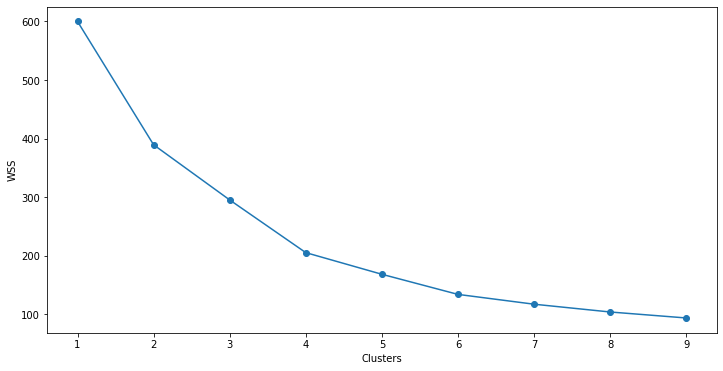

In [25]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(wss_df['num of clusters']),max(wss_df['num of clusters'])+1,1))
plt.plot(wss_df['num of clusters'],wss_df['wss_value'],marker='o')
plt.show()

*Cluster size =4 is selected after observing variance value from elbow/scree plot*

# **CREATING K-MEANS CLUSTER**

In [26]:
kcluster=KMeans(n_clusters=4,random_state=10)

### Adding Cluster Lables in dataset

df['Cluster']=kcluster.fit_predict(scaled_df)

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,0
3,1,23,16,77,0
4,1,31,17,40,0


# **CLUSTERING VISUALIZATION**

In [28]:
from sklearn.decomposition import PCA
pca_2=PCA(2)
pca_2d=pca_2.fit_transform(scaled_df)

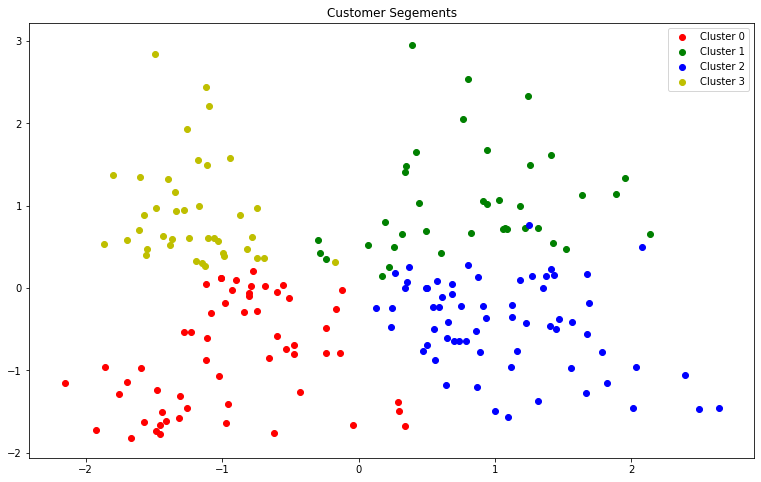

In [29]:
plt.figure(figsize=(13,8))

for i in range(0, pca_2d.shape[0]):
  if df.Cluster[i] == 0:
    c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r')

  elif df.Cluster[i] == 1:
     c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g')
    
  elif df.Cluster[i] == 2:
    c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b')

  elif df.Cluster[i] == 3:
    c4=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y')

plt.title('Customer Segements')
plt.legend([c1, c2, c3, c4],['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])

plt.show()

# **Barplot of Customer Segements**

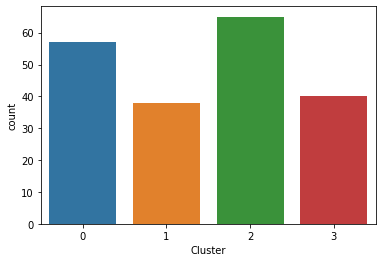

In [30]:
sns.countplot(df['Cluster'])
plt.show()

*From the above visualization graphs we could classify the customers to the respective segment and required marketing strategy can be formed accordingly. This clustering model could help the mall to save their a lot time and money since now they know their customer type and shopping spending behaviour.*

